# Hello Transformers

<img alt="transformer-timeline" caption="The transformers timeline" src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_timeline.png?raw=1" id="transformer-timeline"/>

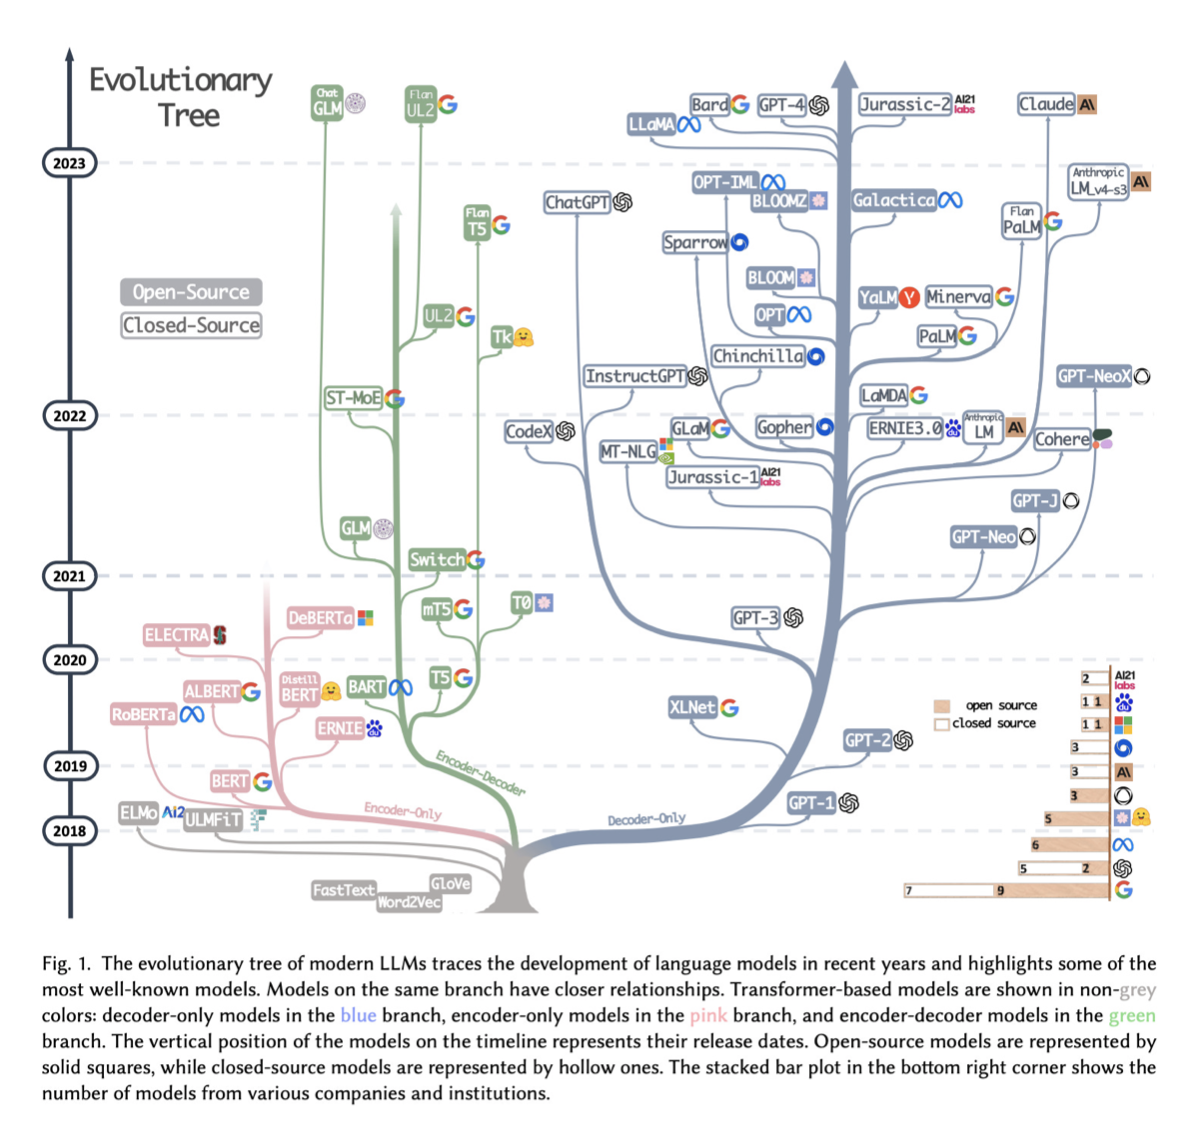

## The Encoder-Decoder Framework

<img alt="rnn" caption="Unrolling an RNN in time." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_rnn.png?raw=1" id="rnn"/>

<img alt="enc-dec" caption="Encoder-decoder architecture with a pair of RNNs. In general, there are many more recurrent layers than those shown." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_enc-dec.png?raw=1" id="enc-dec"/>

## Attention Mechanisms

<img alt="enc-dec-attn" caption="Encoder-decoder architecture with an attention mechanism for a pair of RNNs." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_enc-dec-attn.png?raw=1" id="enc-dec-attn"/>

<img alt="attention-alignment" width="500" caption="RNN encoder-decoder alignment of words in English and the generated translation in French (courtesy of Dzmitry Bahdanau)." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter02_attention-alignment.png?raw=1" id="attention-alignment"/>

<img alt="transformer-self-attn" caption="Encoder-decoder architecture of the original Transformer." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_self-attention.png?raw=1" id="transformer-self-attn"/>

## Transfer Learning in NLP

<img alt="transfer-learning" caption="Comparison of traditional supervised learning (left) and transfer learning (right)." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_transfer-learning.png?raw=1" id="transfer-learning"/>  

<img alt="ulmfit" width="500" caption="The ULMFiT process (courtesy of Jeremy Howard)." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_ulmfit.png?raw=1" id="ulmfit"/>

## Hugging Face Transformers: Bridging the Gap

## A Tour of Transformer Applications

In [ ]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure \
from your online store in Germany. Unfortunately, when I opened the package, \
I discovered to my horror that I had been sent an action figure of Megatron \
instead! As a lifelong enemy of the Decepticons, I hope you can understand my \
dilemma. To resolve the issue, I demand an exchange of Megatron for the \
Optimus Prime figure I ordered. Enclosed are copies of my records concerning \
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

### Text Classification

In [ ]:
#hide_output
from transformers import pipeline

classifier = pipeline("text-classification")

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [ ]:
import pandas as pd

outputs = classifier(text)
pd.DataFrame(outputs)

,label,score
0,NEGATIVE,0.901546


### Named Entity Recognition

In [ ]:
ner_tagger = pipeline("ner", aggregation_strategy="simple")
outputs = ner_tagger(text)
pd.DataFrame(outputs)

Downloading:   0%|          | 0.00/998 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

,entity_group,score,word,start,end
0,ORG,0.879010,Amazon,5,11
1,MISC,0.990859,Optimus Prime,36,49
2,LOC,0.999755,Germany,90,97
3,MISC,0.556571,Mega,208,212
4,PER,0.590256,##tron,212,216
5,ORG,0.669692,Decept,253,259
6,MISC,0.498349,##icons,259,264
7,MISC,0.775362,Megatron,350,358
8,MISC,0.987854,Optimus Prime,367,380
9,PER,0.812096,Bumblebee,502,511


### Question Answering

In [ ]:
reader = pipeline("question-answering")
question = "What does the customer want?"
outputs = reader(question=question, context=text)
pd.DataFrame([outputs])

Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/249M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

,score,start,end,answer
0,0.631292,335,358,an exchange of Megatron


### Summarization

In [ ]:
summarizer = pipeline("summarization")
outputs = summarizer(text, max_length=45, clean_up_tokenization_spaces=True)
print(outputs[0]['summary_text'])

Downloading:   0%|          | 0.00/1.76k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

 Bumblebee ordered an Optimus Prime action figure from your online store in
Germany. Unfortunately, when I opened the package, I discovered to my horror
that I had been sent an action figure of Megatron instead.


### Translation

In [ ]:
translator = pipeline("translation_en_to_de",
                      model="Helsinki-NLP/opus-mt-en-de")
outputs = translator(text, clean_up_tokenization_spaces=True, min_length=100)
print(outputs[0]['translation_text'])

Downloading:   0%|          | 0.00/1.30k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/284M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/750k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/778k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.21M [00:00<?, ?B/s]

Sehr geehrter Amazon, letzte Woche habe ich eine Optimus Prime Action Figur aus
Ihrem Online-Shop in Deutschland bestellt. Leider, als ich das Paket öffnete,
entdeckte ich zu meinem Entsetzen, dass ich stattdessen eine Action Figur von
Megatron geschickt worden war! Als lebenslanger Feind der Decepticons, Ich
hoffe, Sie können mein Dilemma verstehen. Um das Problem zu lösen, Ich fordere
einen Austausch von Megatron für die Optimus Prime Figur habe ich bestellt.
Anbei sind Kopien meiner Aufzeichnungen über diesen Kauf. Ich erwarte, bald von
Ihnen zu hören. Aufrichtig, Bumblebee.


### Text Generation

In [ ]:
#hide
from transformers import set_seed
set_seed(42) # Set the seed to get reproducible results

In [ ]:
generator = pipeline("text-generation")
response = "Dear Bumblebee, I am sorry to hear that your order was mixed up."
prompt = text + "\n\nCustomer service response:\n" + response
outputs = generator(prompt, max_length=200)
print(outputs[0]['generated_text'])

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/523M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.99M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Dear Amazon, last week I ordered an Optimus Prime action figure from your online
store in Germany. Unfortunately, when I opened the package, I discovered to my
horror that I had been sent an action figure of Megatron instead! As a lifelong
enemy of the Decepticons, I hope you can understand my dilemma. To resolve the
issue, I demand an exchange of Megatron for the Optimus Prime figure I ordered.
Enclosed are copies of my records concerning this purchase. I expect to hear
from you soon. Sincerely, Bumblebee.

Customer service response:
Dear Bumblebee, I am sorry to hear that your order was mixed up. I am satisfied
with your purchase. I will gladly see your product and the packaging again
before you go out buying at your shop! I'm a small business owner and have not
been able to deliver my product to customer before and after an Amazon purchase,
so I apologize.

Customer service response:

All of my orders arrived


## The Hugging Face Ecosystem

<img alt="ecosystem" width="500" caption="An overview of the Hugging Face ecosystem of libraries and the Hub." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_hf-ecosystem.png?raw=1" id="ecosystem"/>

### The Hugging Face Hub

<img alt="hub-overview" width="1000" caption="The models page of the Hugging Face Hub, showing filters on the left and a list of models on the right." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_hub-overview.png?raw=1" id="hub-overview"/>

<img alt="hub-model-card" width="1000" caption="A example model card from the Hugging Face Hub. The inference widget is shown on the right, where you can interact with the model." src="https://github.com/nlp-with-transformers/notebooks/blob/main/images/chapter01_hub-model-card.png?raw=1" id="hub-model-card"/>